## Regression

In [9]:
# Import deps
import numpy as np
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [10]:
# Input training data
x_train = np.array([
    5.86, 1.34, 3.65, 4.69, 4.13,
    5.87, 7.91, 5.57, 7.30, 7.89
    ]).reshape(-1, 1)
y_train = np.array([
    0.74, 1.18, 0.51, -0.48, -0.07,
    0.37, 1.35, 0.30, 1.64, 1.75
    ])

x_test = np.array([
    5.80, 0.57, 4.3, 6.55, 0.82,
    3.72, 5.8, 3.26, 6.75, 4.77
    ]).reshape(-1, 1)
y_test = np.array([
    0.93, 1.87, -0.06, 1.6, 1.22,
    0.9, 0.93, 1.53, 1.73, -0.51
    ])

In [11]:
# Linear Regression Model
regr = lr()
regr.fit(x_train, y_train)

LinearRegression()

In [12]:
# Predict
y_pred = regr.predict(x_test)
y_train_pred = regr.predict(x_train)

In [13]:
def print_info(model, y_test, y_pred):
    # Prediction Info
    print(f'x_mean: {np.mean(x_train)} y_mean: {np.mean(y_train)}')

    # The coefficients
    print(f'Coefficients: {model.coef_} Intercept: {model.intercept_}')
    # The mean squared error
    print('Mean squared error: %.2f'
        % mean_squared_error(y_test, y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f'
        % r2_score(y_test, y_pred))

    print(y_pred)

print_info(regr, y_test, y_pred)

x_mean: 5.420999999999999 y_mean: 0.729
Coefficients: [0.15748272] Intercept: -0.12471381723758779
Mean squared error: 0.94
Coefficient of determination: -0.74
[ 0.78868595 -0.03494867  0.55246187  0.90679799  0.00442201  0.4611219
  0.78868595  0.38867985  0.93829453  0.62647875]


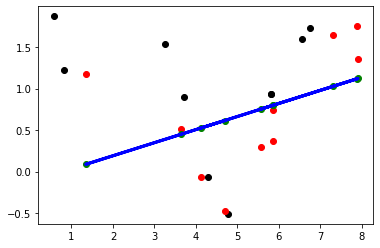

In [14]:
# Plot
plt.scatter(x_test, y_test,  color='black')
plt.scatter(x_train, y_train,  color='red')
plt.scatter(x_train, y_train_pred,  color='green')
plt.plot(x_train, y_train_pred, color='blue', linewidth=3)

plt.xticks()
plt.yticks()

plt.show()
plt.close()

### Polynomial Regression

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [16]:
degree = 2
polyregr = Pipeline([
    ('poly', PolynomialFeatures(degree)),
    ['regr', lr()]
    ])
polyregr.fit(x_train,y_train)

Pipeline(steps=[('poly', PolynomialFeatures()), ['regr', LinearRegression()]])

In [17]:
poly_train_pred = polyregr.predict(x_train)
poly_test_pred = polyregr.predict(x_test)
print(poly_train_pred)
poly_regr = polyregr['regr']
print(f'Coefficients: {poly_regr.coef_} Intercept: {poly_regr.intercept_}')

[0.39912376 1.17520376 0.13901748 0.10898107 0.09147955 0.4030819
 1.73445946 0.29523687 1.22707068 1.71634547]
Coefficients: [ 0.         -1.07370721  0.1252789 ] Intercept: 2.3890206306991177


In [18]:
# Sort the data to plot quad line
xp, yp = zip(*sorted(zip(x_train, poly_train_pred)))

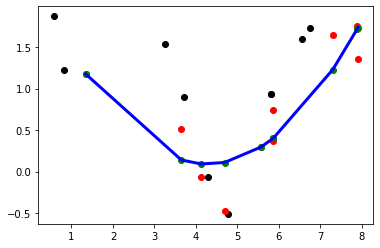

In [19]:
plt.scatter(x_test, y_test,  color='black')
plt.scatter(x_train, y_train,  color='red')
plt.scatter(xp, yp,  color='green')
plt.plot(xp, yp, color='blue', linewidth=3)
plt.xticks()
plt.yticks()

plt.show()